In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import LeaveOneOut
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from scipy import sparse as sp 
import pickle
import warnings
import matplotlib.pyplot as plt
import random
warnings.simplefilter("ignore")


In [2]:
#LOADING DATASETS 
df = pd.read_csv("ML data/cleaned_data.csv",encoding="latin1") #due to special charas should be encoded as latin 1

toCheck = pd.read_csv("ML data/updated_data.csv",encoding="latin1")
#REMOVE MAX
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#DROP EXTRA COLUMNS
df.drop(['Unnamed: 0'], axis=1, inplace=True)
toCheck.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
#CHECKING WHICH ROW IS NULL FROM PRE-PROCESSING
checkNULL = df.isnull()
checkNULL = checkNULL.any(axis=1)
df[checkNULL]

,review_text,verified_purchase
191,NaN,True
523,NaN,True
1072,NaN,True
1111,NaN,True
1230,NaN,True
1316,NaN,True


In [4]:
toCheck = toCheck.drop_duplicates().reset_index(drop=True)

In [5]:
toCheck.iloc[[191,523,1072,1111,1230,1316],[3,4]]


,review_text,verified_purchase
191,A+,True
523,5*,True
1072,very,True
1111,Does what it should,True
1230,A+,True
1316,A*****,True


In [6]:
#DROP THE NULL ROWS
df = df.dropna(how='any',axis=0) 

In [7]:
#UPDATED VP VALUES 
df["verified_purchase"].value_counts(normalize=True)

False    0.525701
True     0.474299
Name: verified_purchase, dtype: float64

In [8]:
#ASSIGN THE VARIABLES
X = df['review_text'] #input var
y = df['verified_purchase'] #target var

In [9]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
entiredf = format(df.shape[0])
traindf = format(X_train.shape[0])
testdf = format(X_test.shape[0])

print('Number of rows:')
print('Entire dataset:', entiredf)
print('Train dataset:', traindf)
print('Test dataset:',testdf)

Number of rows:
Entire dataset: 1712
Train dataset: 1369
Test dataset: 343


Logistic Regression: {'Accuracy': 0.8387738052614531, 'Precision': 0.8450529555953349, 'Recall': 0.8387738052614531, 'F1 Score': 0.8387599454126591}
Decision Tree: {'Accuracy': 0.7821219715956558, 'Precision': 0.7836098198717136, 'Recall': 0.7821219715956558, 'F1 Score': 0.7822761916034365}
Random Forest: {'Accuracy': 0.830596900414301, 'Precision': 0.8377542709892729, 'Recall': 0.830596900414301, 'F1 Score': 0.8306098161838147}
K Nearest Neighbors: {'Accuracy': 0.5735733892554515, 'Precision': 0.7740405352902834, 'Recall': 0.5735733892554515, 'F1 Score': 0.49448434111381834}
Multinomial Naive Bayes: {'Accuracy': 0.8031660784614598, 'Precision': 0.8058745645626917, 'Recall': 0.8031660784614598, 'F1 Score': 0.8032888370542619}
Support Vector Machine: {'Accuracy': 0.8329360817008507, 'Precision': 0.8394866465122621, 'Recall': 0.8329360817008507, 'F1 Score': 0.8329330477643838}
Extreme Gradient Boosting Trees: {'Accuracy': 0.8288408095067601, 'Precision': 0.8329877043196603, 'Recall': 0.8

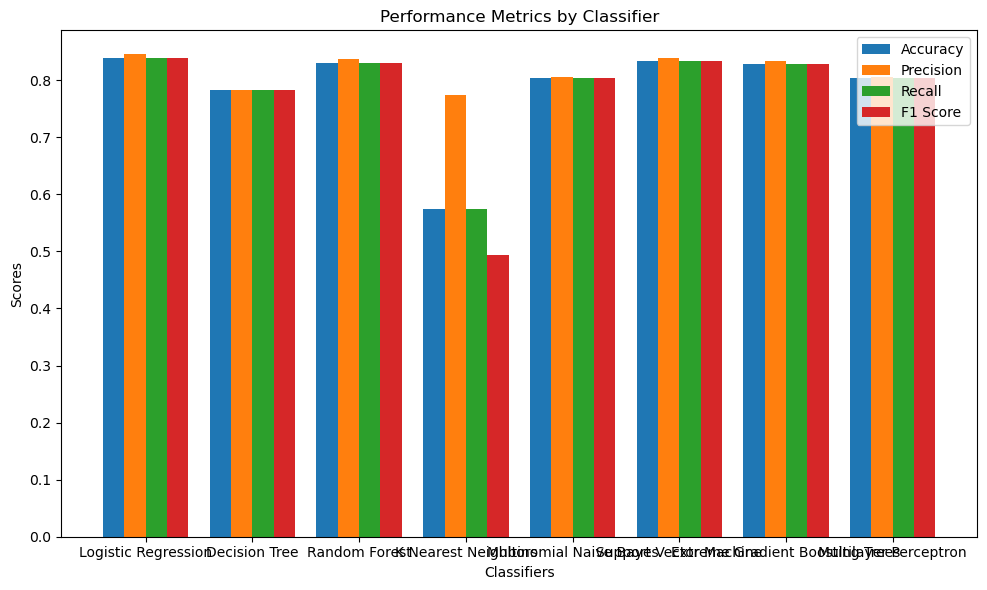

                                 Accuracy  Precision    Recall  F1 Score
Logistic Regression              0.838774   0.845053  0.838774  0.838760
Decision Tree                    0.782122   0.783610  0.782122  0.782276
Random Forest                    0.830597   0.837754  0.830597  0.830610
K Nearest Neighbors              0.573573   0.774041  0.573573  0.494484
Multinomial Naive Bayes          0.803166   0.805875  0.803166  0.803289
Support Vector Machine           0.832936   0.839487  0.832936  0.832933
Extreme Gradient Boosting Trees  0.828841   0.832988  0.828841  0.828970
Multilayer Perceptron            0.803144   0.805968  0.803144  0.803342


In [11]:
# Vectorizing text data
count_vectorizer = CountVectorizer(stop_words='english')
X_ct = count_vectorizer.fit_transform(X)

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(),
    'Extreme Gradient Boosting Trees': XGBClassifier(),
    'Multilayer Perceptron': MLPClassifier()
}

# KFold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_cv = {}
for name, clf in classifiers.items():
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for train_index, test_index in kf.split(X_ct):
        X_train, X_test = X_ct[train_index], X_ct[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    results_cv[name] = {
        "Accuracy": np.mean(accuracies),
        "Precision": np.mean(precisions),
        "Recall": np.mean(recalls),
        "F1 Score": np.mean(f1_scores)
    }

# Display results
for name, metrics in results_cv.items():
    print(f"{name}: {metrics}")
    

# Extracting metrics and names
names = list(results_cv.keys())
metrics = list(results_cv.values())

# Extracting individual metric values
d_accuracy = [metric['Accuracy'] for metric in metrics]
d_precision = [metric['Precision'] for metric in metrics]
d_recall = [metric['Recall'] for metric in metrics]
d_f1_score = [metric['F1 Score'] for metric in metrics]

# Creating bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(len(names))

bar1 = ax.bar(index, d_accuracy, bar_width, label='Accuracy')
bar2 = ax.bar([i + bar_width for i in index], d_precision, bar_width, label='Precision')
bar3 = ax.bar([i + 2 * bar_width for i in index], d_recall, bar_width, label='Recall')
bar4 = ax.bar([i + 3 * bar_width for i in index], d_f1_score, bar_width, label='F1 Score')


ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Classifier')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(names)
ax.legend()

plt.tight_layout()
plt.show()
results_df = pd.DataFrame(results_cv).T
print(results_df)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

count_vectorizer.fit(X_train)
#print('\nVocabulary: \n', count_vectorizer.vocabulary_)

X_train_cv = count_vectorizer.fit_transform(X_train)
X_test_cv = count_vectorizer.transform(X_test)

# Define hyperparameter distributions for each classifier
hyperparameters = {
    'Logistic Regression': {
        'C': np.random.uniform(0.1, 1000, size=10),
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    'Decision Tree': {
        'max_depth': np.arange(3, 6),
        'splitter': ['best', 'random'],
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': np.random.randint(100, 1001, size=10),
        'max_depth': np.arange(3, 6),
        'criterion': ['gini', 'entropy']
    },
    'K Nearest Neighbors': {
        'n_neighbors': range(1, 21),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Multinomial Naive Bayes': {
        'alpha': np.arange(0.1, 2, 0.1),
        'fit_prior': [True, False]
    },
    'Support Vector Machine': {
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
        'C': np.random.uniform(0.1, 1000, size=10),
        'degree': np.arange(3, 11),
        'gamma': ['scale', 'auto'],
        'probability': [1]
    },
    'Extreme Gradient Boosting Trees': {
        'n_estimators': np.random.randint(100, 1001, size=10),
        'max_depth': np.arange(3, 6),
        'gamma': np.random.uniform(0, 10, size=10),
        'learning_rate': np.random.uniform(0.01, 1, size=10)
    },
    'Multilayer Perceptron': {
        'max_iter': [600, 800, 1000, 1200],
        'hidden_layer_sizes': [(random.randint(2, 5), random.randint(5, 51)) for _ in range(10)],
        'activation': ['relu', 'tanh', 'logistic', 'identity']
    }
}

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'K Nearest Neighbors': KNeighborsClassifier,
    'Multinomial Naive Bayes': MultinomialNB,
    'Support Vector Machine': SVC,
    'Extreme Gradient Boosting Trees': XGBClassifier,
    'Multilayer Perceptron': MLPClassifier
}

# Define function for hyperparameter optimization
def hyperparameter_optimization(classifier_name, classifier, hyperparameters):
    print(f"Optimizing hyperparameters for {classifier_name}...")
    random_search = RandomizedSearchCV(estimator=classifier(), param_distributions=hyperparameters, n_iter=100,
                                       scoring='accuracy', cv=KFold(n_splits=10, shuffle=True), random_state=42)
    random_search.fit(X_train_cv, y_train)
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    print(f"Best hyperparameters for {classifier_name}: {best_params}")
    return best_model, best_params

# Perform hyperparameter optimization for each classifier
best_models = {}
best_params_dict = {}

for classifier_name, classifier in classifiers.items():
    best_model, best_params = hyperparameter_optimization(classifier_name, classifier, hyperparameters[classifier_name])
    best_models[classifier_name] = best_model
    best_params_dict[classifier_name] = best_params
    

# Evaluate the best models on the test set
results_opt = {}
for classifier_name, model in best_models.items():
    y_pred = model.predict(X_test_cv)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results_opt[classifier_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print results
print('\n')
for classifier_name, metrics in results_opt.items():
    print(f"Results for {classifier_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print('\n')
    
print('---------------------------------------------------------------')    



Optimizing hyperparameters for Logistic Regression...
Best hyperparameters for Logistic Regression: {'solver': 'saga', 'C': 878.0611532718071}
Optimizing hyperparameters for Decision Tree...
Best hyperparameters for Decision Tree: {'splitter': 'random', 'max_depth': 5, 'criterion': 'gini'}
Optimizing hyperparameters for Random Forest...
Best hyperparameters for Random Forest: {'n_estimators': 160, 'max_depth': 5, 'criterion': 'entropy'}
Optimizing hyperparameters for K Nearest Neighbors...
Best hyperparameters for K Nearest Neighbors: {'weights': 'uniform', 'n_neighbors': 2, 'algorithm': 'auto'}
Optimizing hyperparameters for Multinomial Naive Bayes...
Best hyperparameters for Multinomial Naive Bayes: {'fit_prior': False, 'alpha': 0.1}
Optimizing hyperparameters for Support Vector Machine...
Best hyperparameters for Support Vector Machine: {'probability': 1, 'kernel': 'sigmoid', 'gamma': 'auto', 'degree': 4, 'C': 414.91325332729286}
Optimizing hyperparameters for Extreme Gradient Boost

In [13]:
classifiers_bagging = {
    'Logistic Regression': LogisticRegression,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'K Nearest Neighbors': KNeighborsClassifier,
    'Multinomial Naive Bayes': MultinomialNB,
    'Support Vector Machine': SVC,
    'Multilayer Perceptron': MLPClassifier
}

# As MLP and KNN does not supporrt sample_weights it is exculded from Adaboost as weak classifier
classifiers_adaboost = {
    'Logistic Regression': LogisticRegression,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'Multinomial Naive Bayes': MultinomialNB,
    'Support Vector Machine': SVC,
}

# Define function for training ensembles
def train_ensemble_bagging(classifier_name, classifier, best_params):
    print(f"Training ensemble bagging for {classifier_name}...")
    # Get the best hyperparameters for the classifier
    params = best_params_dict[classifier_name]
    # Initialize the ensemble classifiers
    bagging_classifier = BaggingClassifier(base_estimator=classifier(**params), n_estimators=10, random_state=42)
    # Train the bagging ensemble
    bagging_classifier.fit(X_train_cv, y_train)
    return bagging_classifier

def train_ensemble_adaboost(classifier_name, classifier, best_params):
    print(f"Training ensemble adaboost for {classifier_name}...")
    # Get the best hyperparameters for the classifier
    params = best_params_dict[classifier_name]
     # Initialize the ensemble classifiers
    adaboost_classifier = AdaBoostClassifier(base_estimator=classifier(**params), n_estimators=10, random_state=42)
    # Train the AdaBoost ensemble
    adaboost_classifier.fit(X_train_cv, y_train)
    return adaboost_classifier

# Train ensembles for each classifier
bagging_ensembles = {}
for classifier_name, classifier in classifiers_bagging.items():
    bagging_ensemble = train_ensemble_bagging(classifier_name, classifier, best_params_dict)
    bagging_ensembles[classifier_name] = bagging_ensemble

adaboost_ensembles = {}
for classifier_name, classifier in classifiers_adaboost.items():
    adaboost_ensemble = train_ensemble_adaboost(classifier_name, classifier, best_params_dict)
    adaboost_ensembles[classifier_name] = adaboost_ensemble

# Evaluate the bagging ensembles on the test set
bagging_results = {}
for classifier_name, ensemble in bagging_ensembles.items():
    y_pred = ensemble.predict(X_test_cv)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bagging_results[classifier_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Evaluate the AdaBoost ensembles on the test set
adaboost_results = {}
for classifier_name, ensemble in adaboost_ensembles.items():
    y_pred = ensemble.predict(X_test_cv)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    adaboost_results[classifier_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print results for bagging ensembles
print('\n')
print('---------------------------------------------------------------')    
print("Results for Bagging Ensembles:")
for classifier_name, metrics in bagging_results.items():
    print(f"Results for Bagging Ensembles  {classifier_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print('\n')

# Print results for AdaBoost ensembles
print("Results for AdaBoost Ensembles:")
for classifier_name, metrics in adaboost_results.items():
    print(f"Results for AdaBoost Ensemble with {classifier_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print('\n')


Training ensemble bagging for Logistic Regression...
Training ensemble bagging for Decision Tree...
Training ensemble bagging for Random Forest...
Training ensemble bagging for K Nearest Neighbors...
Training ensemble bagging for Multinomial Naive Bayes...
Training ensemble bagging for Support Vector Machine...
Training ensemble bagging for Multilayer Perceptron...
Training ensemble adaboost for Logistic Regression...
Training ensemble adaboost for Decision Tree...
Training ensemble adaboost for Random Forest...
Training ensemble adaboost for Multinomial Naive Bayes...
Training ensemble adaboost for Support Vector Machine...


---------------------------------------------------------------
Results for Bagging Ensembles:
Results for Bagging Ensembles  Logistic Regression:
Accuracy: 0.8279883381924198
Precision: 0.8197674418604651
Recall: 0.834319526627219
F1 Score: 0.8269794721407624


Results for Bagging Ensembles  Decision Tree:
Accuracy: 0.7667638483965015
Precision: 0.69098712446351

Results for Optimized Algorithm:
                        Classifier  Accuracy  Precision    Recall  F1 Score
0              Logistic Regression  0.825073   0.807910  0.846154  0.826590
1                    Decision Tree  0.708455   0.638554  0.940828  0.760766
2                    Random Forest  0.830904   0.776119  0.923077  0.843243
3              K Nearest Neighbors  0.690962   0.627530  0.917160  0.745192
4          Multinomial Naive Bayes  0.795918   0.823529  0.745562  0.782609
5           Support Vector Machine  0.848397   0.796954  0.928994  0.857923
6  Extreme Gradient Boosting Trees  0.827988   0.792553  0.881657  0.834734
7            Multilayer Perceptron  0.813411   0.800000  0.828402  0.813953
----------------------------------------------------------------------------------------


Results for Ensemble Bagging:
                Classifier  Accuracy  Precision    Recall  F1 Score
0      Logistic Regression  0.827988   0.819767  0.834320  0.826979
1            Decision Tree

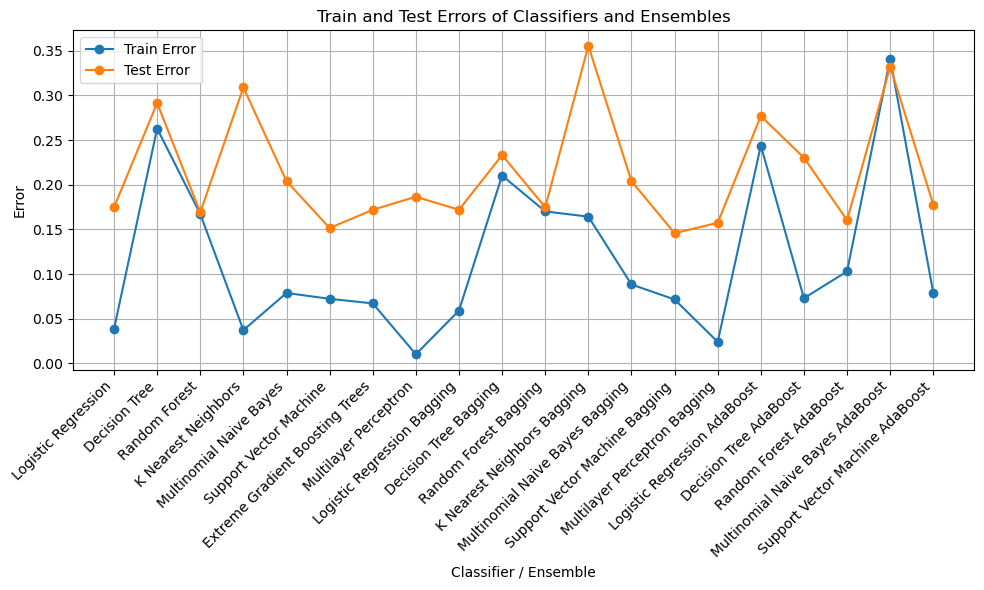

In [14]:
# Store all results in a DataFrame
results_df = pd.DataFrame(results_opt).T
results_df.index.name = 'Classifier'
results_df.reset_index(inplace=True)

bagging_df = pd.DataFrame(bagging_results).T
bagging_df.index.name = 'Classifier'
bagging_df.reset_index(inplace=True)

adaboost_df = pd.DataFrame(adaboost_results).T
adaboost_df.index.name = 'Classifier'
adaboost_df.reset_index(inplace=True)

# Merge all results into one DataFrame
merged_results = pd.concat([results_df, bagging_df, adaboost_df], keys=['Optimized', 'Bagging', 'AdaBoost'])


# Print the results
print("Results for Optimized Algorithm:")
print(results_df)
print('----------------------------------------------------------------------------------------')
print('\n')

print("Results for Ensemble Bagging:")
print(bagging_df)
print('----------------------------------------------------------------------------------------')
print('\n')

print("Results for Ensemble Adaboost:")
print(adaboost_df)
print('----------------------------------------------------------------------------------------')
print('\n')


#print(merged_results)

train_errors = {}
test_errors = {}
for classifier_name, model in best_models.items():
    train_errors[classifier_name] = 1 - model.score(X_train_cv, y_train)
    test_errors[classifier_name] = 1 - results_opt[classifier_name]['Accuracy']

for classifier_name, ensemble in bagging_ensembles.items():
    train_errors[f"{classifier_name} Bagging"] = 1 - ensemble.score(X_train_cv, y_train)
    test_errors[f"{classifier_name} Bagging"] = 1 - bagging_results[classifier_name]['Accuracy']

for classifier_name, ensemble in adaboost_ensembles.items():
    train_errors[f"{classifier_name} AdaBoost"] = 1 - ensemble.score(X_train_cv, y_train)
    test_errors[f"{classifier_name} AdaBoost"] = 1 - adaboost_results[classifier_name]['Accuracy']

error_data = {'Classifier/Ensemble': list(train_errors.keys()),
              'Train Error': list(train_errors.values()),
              'Test Error': list(test_errors.values())}

# Create a DataFrame
error_df = pd.DataFrame(error_data)

# Print the DataFrame
print(error_df)    

# Plot train and test errors
plt.figure(figsize=(10, 6))
plt.plot(train_errors.keys(), train_errors.values(), marker='o', label='Train Error')
plt.plot(test_errors.keys(), test_errors.values(), marker='o', label='Test Error')
plt.xlabel('Classifier / Ensemble')
plt.ylabel('Error')
plt.title('Train and Test Errors of Classifiers and Ensembles')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Logistic Regression: {'Accuracy': 0.8387738052614531, 'Precision': 0.8450529555953349, 'Recall': 0.8387738052614531, 'F1 Score': 0.8387599454126591}
Decision Tree: {'Accuracy': 0.7815218317903603, 'Precision': 0.7829284858184341, 'Recall': 0.7815218317903603, 'F1 Score': 0.7817614200612688}
Random Forest: {'Accuracy': 0.8282679487835235, 'Precision': 0.8353472359849544, 'Recall': 0.8282679487835235, 'F1 Score': 0.8282678799074494}
K Nearest Neighbors: {'Accuracy': 0.5735733892554515, 'Precision': 0.7740405352902834, 'Recall': 0.5735733892554515, 'F1 Score': 0.49448434111381834}
Multinomial Naive Bayes: {'Accuracy': 0.8031660784614598, 'Precision': 0.8058745645626917, 'Recall': 0.8031660784614598, 'F1 Score': 0.8032888370542619}
Support Vector Machine: {'Accuracy': 0.8329360817008507, 'Precision': 0.8394866465122621, 'Recall': 0.8329360817008507, 'F1 Score': 0.8329330477643838}
Extreme Gradient Boosting Trees: {'Accuracy': 0.8288408095067601, 'Precision': 0.8329877043196603, 'Recall': 0

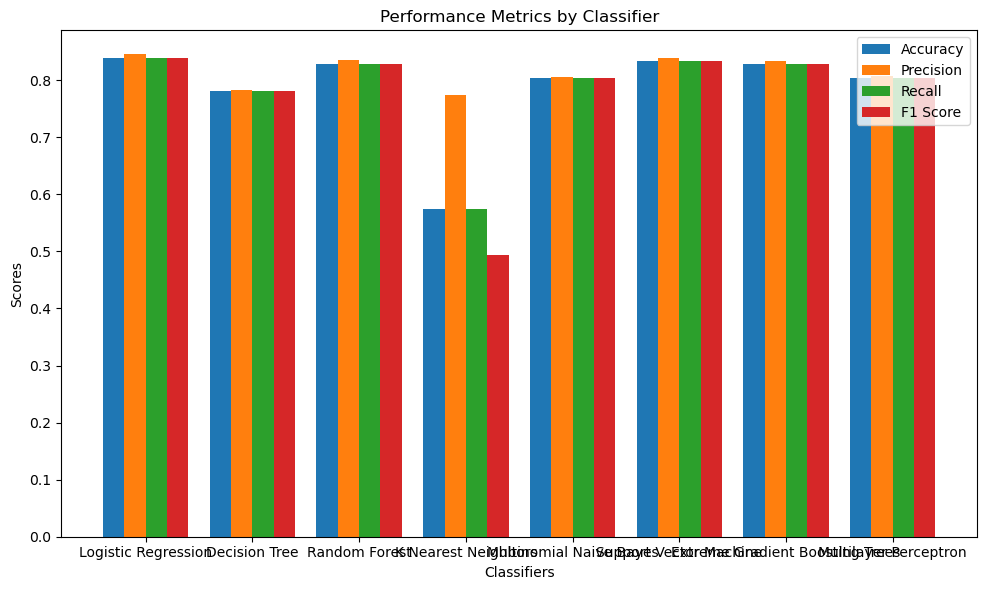

                                 Accuracy  Precision    Recall  F1 Score
Logistic Regression              0.838774   0.845053  0.838774  0.838760
Decision Tree                    0.781522   0.782928  0.781522  0.781761
Random Forest                    0.828268   0.835347  0.828268  0.828268
K Nearest Neighbors              0.573573   0.774041  0.573573  0.494484
Multinomial Naive Bayes          0.803166   0.805875  0.803166  0.803289
Support Vector Machine           0.832936   0.839487  0.832936  0.832933
Extreme Gradient Boosting Trees  0.828841   0.832988  0.828841  0.828970
Multilayer Perceptron            0.803732   0.806471  0.803732  0.803928


In [15]:
# Vectorizing text data
TFIDF_vectorizer  = TfidfVectorizer(stop_words='english')
X_tf = count_vectorizer.fit_transform(X)

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(),
    'Extreme Gradient Boosting Trees': XGBClassifier(),
    'Multilayer Perceptron': MLPClassifier()
}

# KFold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_tf = {}
for name, clf in classifiers.items():
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for train_index, test_index in kf.split(X_tf):
        X_train, X_test = X_ct[train_index], X_ct[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    results_tf[name] = {
        "Accuracy": np.mean(accuracies),
        "Precision": np.mean(precisions),
        "Recall": np.mean(recalls),
        "F1 Score": np.mean(f1_scores)
    }

# Display results
for name, metrics in results_tf.items():
    print(f"{name}: {metrics}")
    

# Extracting metrics and names
names = list(results_tf.keys())
metrics = list(results_tf.values())

# Extracting individual metric values
tf_accuracy = [metric['Accuracy'] for metric in metrics]
tf_precision = [metric['Precision'] for metric in metrics]
tf_recall = [metric['Recall'] for metric in metrics]
tf_f1_score = [metric['F1 Score'] for metric in metrics]

# Creating bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(len(names))

bar1 = ax.bar(index, tf_accuracy, bar_width, label='Accuracy')
bar2 = ax.bar([i + bar_width for i in index], tf_precision, bar_width, label='Precision')
bar3 = ax.bar([i + 2 * bar_width for i in index], tf_recall, bar_width, label='Recall')
bar4 = ax.bar([i + 3 * bar_width for i in index], tf_f1_score, bar_width, label='F1 Score')


ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Classifier')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(names)
ax.legend()

plt.tight_layout()
plt.show()
results_df = pd.DataFrame(results_tf).T
print(results_df)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

count_vectorizer.fit(X_train)
#print('\nVocabulary: \n', count_vectorizer.vocabulary_)

X_train_tf = count_vectorizer.fit_transform(X_train)
X_test_tf = count_vectorizer.transform(X_test)

# Define hyperparameter distributions for each classifier
hyperparameters = {
    'Logistic Regression': {
        'C': np.random.uniform(0.1, 1000, size=10),
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    'Decision Tree': {
        'max_depth': np.arange(3, 6),
        'splitter': ['best', 'random'],
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': np.random.randint(100, 1001, size=10),
        'max_depth': np.arange(3, 6),
        'criterion': ['gini', 'entropy']
    },
    'K Nearest Neighbors': {
        'n_neighbors': range(1, 21),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Multinomial Naive Bayes': {
        'alpha': np.arange(0.1, 2, 0.1),
        'fit_prior': [True, False]
    },
    'Support Vector Machine': {
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
        'C': np.random.uniform(0.1, 1000, size=10),
        'degree': np.arange(3, 11),
        'gamma': ['scale', 'auto'],
        'probability': [1]
    },
    'Extreme Gradient Boosting Trees': {
        'n_estimators': np.random.randint(100, 1001, size=10),
        'max_depth': np.arange(3, 6),
        'gamma': np.random.uniform(0, 10, size=10),
        'learning_rate': np.random.uniform(0.01, 1, size=10)
    },
    'Multilayer Perceptron': {
        'max_iter': [600, 800, 1000, 1200],
        'hidden_layer_sizes': [(random.randint(2, 5), random.randint(5, 51)) for _ in range(10)],
        'activation': ['relu', 'tanh', 'logistic', 'identity']
    }
}


# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'K Nearest Neighbors': KNeighborsClassifier,
    'Multinomial Naive Bayes': MultinomialNB,
    'Support Vector Machine': SVC,
    'Extreme Gradient Boosting Trees': XGBClassifier,
    'Multilayer Perceptron': MLPClassifier
}

# Define function for hyperparameter optimization
def hyperparameter_optimization(classifier_name, classifier, hyperparameters):
    print(f"Optimizing hyperparameters for {classifier_name}...")
    random_search = RandomizedSearchCV(estimator=classifier(), param_distributions=hyperparameters, n_iter=100,
                                       scoring='accuracy', cv=KFold(n_splits=10, shuffle=True), random_state=42)
    random_search.fit(X_train_tf, y_train)
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    print(f"Best hyperparameters for {classifier_name}: {best_params}")
    return best_model, best_params

# Perform hyperparameter optimization for each classifier
best_models = {}
best_params_dict = {}

for classifier_name, classifier in classifiers.items():
    best_model, best_params = hyperparameter_optimization(classifier_name, classifier, hyperparameters[classifier_name])
    best_models[classifier_name] = best_model
    best_params_dict[classifier_name] = best_params
    

# Evaluate the best models on the test set
results_opt = {}
for classifier_name, model in best_models.items():
    y_pred = model.predict(X_test_tf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results_opt[classifier_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print results
print('\n')
for classifier_name, metrics in results_opt.items():
    print(f"Results for {classifier_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print('\n')
    
print('---------------------------------------------------------------')

Optimizing hyperparameters for Logistic Regression...
Best hyperparameters for Logistic Regression: {'solver': 'saga', 'C': 623.2577482655946}
Optimizing hyperparameters for Decision Tree...
Best hyperparameters for Decision Tree: {'splitter': 'best', 'max_depth': 5, 'criterion': 'gini'}
Optimizing hyperparameters for Random Forest...
Best hyperparameters for Random Forest: {'n_estimators': 625, 'max_depth': 4, 'criterion': 'entropy'}
Optimizing hyperparameters for K Nearest Neighbors...
Best hyperparameters for K Nearest Neighbors: {'weights': 'uniform', 'n_neighbors': 2, 'algorithm': 'auto'}
Optimizing hyperparameters for Multinomial Naive Bayes...
Best hyperparameters for Multinomial Naive Bayes: {'fit_prior': False, 'alpha': 0.1}
Optimizing hyperparameters for Support Vector Machine...
Best hyperparameters for Support Vector Machine: {'probability': 1, 'kernel': 'sigmoid', 'gamma': 'auto', 'degree': 3, 'C': 551.1447962410798}
Optimizing hyperparameters for Extreme Gradient Boosting

In [23]:
classifiers_bagging = {
    'Logistic Regression': LogisticRegression,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'K Nearest Neighbors': KNeighborsClassifier,
    'Multinomial Naive Bayes': MultinomialNB,
    'Support Vector Machine': SVC,
    'Multilayer Perceptron': MLPClassifier
}

# As MLP and KNN does not supporrt sample_weights it is exculded from Adaboost as weak classifier
classifiers_adaboost = {
    'Logistic Regression': LogisticRegression,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'Multinomial Naive Bayes': MultinomialNB,
    'Support Vector Machine': SVC,
}

# Define function for training ensembles
def train_ensemble_bagging(classifier_name, classifier, best_params):
    print(f"Training ensemble bagging for {classifier_name}...")
    # Get the best hyperparameters for the classifier
    params = best_params_dict[classifier_name]
    if classifier_name== 'Support Vector Machine':
        params['probability'] = True
    # Initialize the ensemble classifiers
    bagging_classifier = BaggingClassifier(base_estimator=classifier(**params), n_estimators=10, random_state=42)
    # Train the bagging ensemble
    bagging_classifier.fit(X_train_tf, y_train)
    return bagging_classifier

def train_ensemble_adaboost(classifier_name, classifier, best_params):
    print(f"Training ensemble adaboost for {classifier_name}...")
    # Get the best hyperparameters for the classifier
    params = best_params_dict[classifier_name]
    if classifier_name== 'Support Vector Machine':
        params['probability'] = True
     # Initialize the ensemble classifiers
    adaboost_classifier = AdaBoostClassifier(base_estimator=classifier(**params), n_estimators=10, random_state=42)
    # Train the AdaBoost ensemble
    adaboost_classifier.fit(X_train_tf, y_train)
    return adaboost_classifier

# Train ensembles for each classifier
bagging_ensembles = {}
for classifier_name, classifier in classifiers_bagging.items():
    bagging_ensemble = train_ensemble_bagging(classifier_name, classifier, best_params_dict)
    bagging_ensembles[classifier_name] = bagging_ensemble

adaboost_ensembles = {}
for classifier_name, classifier in classifiers_adaboost.items():
    adaboost_ensemble = train_ensemble_adaboost(classifier_name, classifier, best_params_dict)
    adaboost_ensembles[classifier_name] = adaboost_ensemble

# Evaluate the bagging ensembles on the test set
bagging_results = {}
for classifier_name, ensemble in bagging_ensembles.items():
    y_pred = ensemble.predict(X_test_tf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bagging_results[classifier_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Evaluate the AdaBoost ensembles on the test set
adaboost_results = {}
for classifier_name, ensemble in adaboost_ensembles.items():
    y_pred = ensemble.predict(X_test_tf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    adaboost_results[classifier_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print results for bagging ensembles
print('\n')
print('---------------------------------------------------------------')    
print("Results for Bagging Ensembles:")
for classifier_name, metrics in bagging_results.items():
    print(f"Results for Bagging Ensembles  {classifier_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print('\n')

# Print results for AdaBoost ensembles
print("Results for AdaBoost Ensembles:")
for classifier_name, metrics in adaboost_results.items():
    print(f"Results for AdaBoost Ensemble with {classifier_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print('\n')

Training ensemble bagging for Logistic Regression...
Training ensemble bagging for Decision Tree...
Training ensemble bagging for Random Forest...
Training ensemble bagging for K Nearest Neighbors...
Training ensemble bagging for Multinomial Naive Bayes...
Training ensemble bagging for Support Vector Machine...
Training ensemble bagging for Multilayer Perceptron...
Training ensemble adaboost for Logistic Regression...
Training ensemble adaboost for Decision Tree...
Training ensemble adaboost for Random Forest...
Training ensemble adaboost for Multinomial Naive Bayes...
Training ensemble adaboost for Support Vector Machine...


---------------------------------------------------------------
Results for Bagging Ensembles:
Results for Bagging Ensembles  Logistic Regression:
Accuracy: 0.8279883381924198
Precision: 0.8197674418604651
Recall: 0.834319526627219
F1 Score: 0.8269794721407624


Results for Bagging Ensembles  Decision Tree:
Accuracy: 0.760932944606414
Precision: 0.689956331877729

Results for Optimized Algorithm:
                        Classifier  Accuracy  Precision    Recall  F1 Score
0              Logistic Regression  0.822157   0.803371  0.846154  0.824207
1                    Decision Tree  0.740525   0.668067  0.940828  0.781327
2                    Random Forest  0.827988   0.777778  0.911243  0.839237
3              K Nearest Neighbors  0.690962   0.627530  0.917160  0.745192
4          Multinomial Naive Bayes  0.795918   0.823529  0.745562  0.782609
5           Support Vector Machine  0.848397   0.800000  0.923077  0.857143
6  Extreme Gradient Boosting Trees  0.833819   0.797872  0.887574  0.840336
7            Multilayer Perceptron  0.819242   0.802260  0.840237  0.820809
----------------------------------------------------------------------------------------


Results for Ensemble Bagging:
                Classifier  Accuracy  Precision    Recall  F1 Score
0      Logistic Regression  0.827988   0.819767  0.834320  0.826979
1            Decision Tree

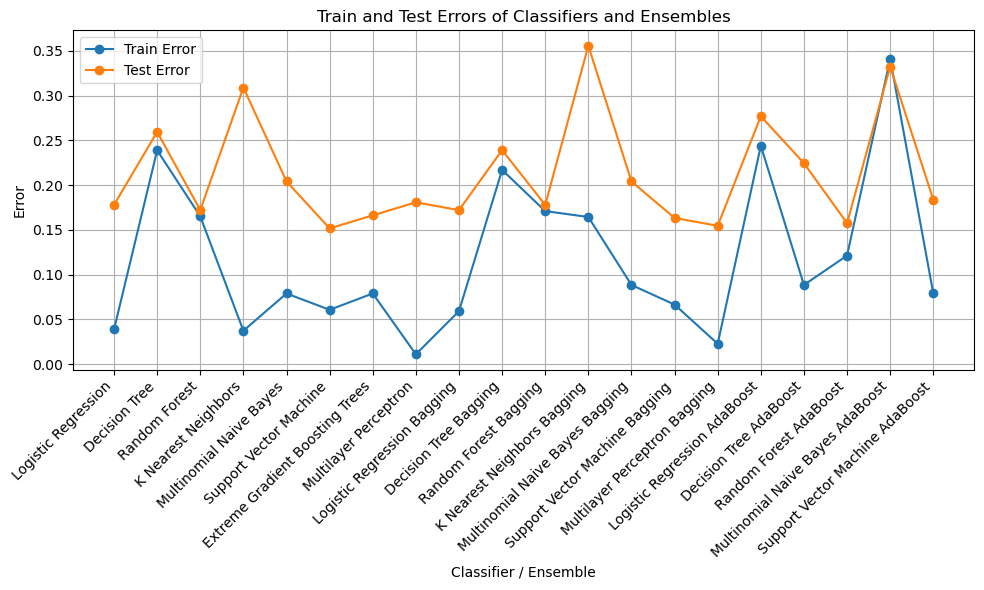

In [24]:
# Store all results in a DataFrame
results_df = pd.DataFrame(results_opt).T
results_df.index.name = 'Classifier'
results_df.reset_index(inplace=True)

bagging_df = pd.DataFrame(bagging_results).T
bagging_df.index.name = 'Classifier'
bagging_df.reset_index(inplace=True)

adaboost_df = pd.DataFrame(adaboost_results).T
adaboost_df.index.name = 'Classifier'
adaboost_df.reset_index(inplace=True)

# Merge all results into one DataFrame
merged_results = pd.concat([results_df, bagging_df, adaboost_df], keys=['Optimized', 'Bagging', 'AdaBoost'])


# Print the results
print("Results for Optimized Algorithm:")
print(results_df)
print('----------------------------------------------------------------------------------------')
print('\n')

print("Results for Ensemble Bagging:")
print(bagging_df)
print('----------------------------------------------------------------------------------------')
print('\n')

print("Results for Ensemble Adaboost:")
print(adaboost_df)
print('----------------------------------------------------------------------------------------')
print('\n')


#print(merged_results)

train_errors = {}
test_errors = {}
for classifier_name, model in best_models.items():
    train_errors[classifier_name] = 1 - model.score(X_train_cv, y_train)
    test_errors[classifier_name] = 1 - results_opt[classifier_name]['Accuracy']

for classifier_name, ensemble in bagging_ensembles.items():
    train_errors[f"{classifier_name} Bagging"] = 1 - ensemble.score(X_train_cv, y_train)
    test_errors[f"{classifier_name} Bagging"] = 1 - bagging_results[classifier_name]['Accuracy']

for classifier_name, ensemble in adaboost_ensembles.items():
    train_errors[f"{classifier_name} AdaBoost"] = 1 - ensemble.score(X_train_cv, y_train)
    test_errors[f"{classifier_name} AdaBoost"] = 1 - adaboost_results[classifier_name]['Accuracy']

error_data = {'Classifier/Ensemble': list(train_errors.keys()),
              'Train Error': list(train_errors.values()),
              'Test Error': list(test_errors.values())}

# Create a DataFrame
error_df = pd.DataFrame(error_data)

# Print the DataFrame
print(error_df)    

# Plot train and test errors
plt.figure(figsize=(10, 6))
plt.plot(train_errors.keys(), train_errors.values(), marker='o', label='Train Error')
plt.plot(test_errors.keys(), test_errors.values(), marker='o', label='Test Error')
plt.xlabel('Classifier / Ensemble')
plt.ylabel('Error')
plt.title('Train and Test Errors of Classifiers and Ensembles')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()